I am trying to get the exponential fit model right. As a first pass I will use only the real dataset. 

In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats 
import matplotlib.ticker as plticker
from scipy.optimize import curve_fit
from scipy import optimize
from lmfit import minimize, Parameters, Parameter, report_fit

In [79]:
#Generate df of the observations
#DA is in km^2 and Q is in l/s
d={'DA':[82.450, 27.150, 16.275, 117.275, 382.975,
                              1596.280, 127.675, 9.44982, 2609.570, 3367.000], 
                             'Q':[8.662133483, 0.68431375, 0.868684824, 3.60222113,
                              7.995490543, 24.09174135, 8.038100597, 0.935,
                              119.5290555, 271.842]}
df = pd.DataFrame(data=d, dtype=float)
df

,DA,Q
0,82.45000,8.662133
1,27.15000,0.684314
2,16.27500,0.868685
3,117.27500,3.602221
4,382.97500,7.995491
5,1596.28000,24.091741
6,127.67500,8.038101
7,9.44982,0.935000
8,2609.57000,119.529055
9,3367.00000,271.842000


In [97]:
#Observed data
xdata = df['DA']
ydata = df['Q']

#define general powerlaw equation
def func(x, N, a, d):
    return N*np.exp(a*x)+d

##TRENDS:
#smaller A gives a smaller amplitude
#negative A flips the curve across a horizontal plane
#smaller c controls the shape by flattening the "knee" of the curve
#negative c flips the curve across a vertical plane
#d sets the y-intercept

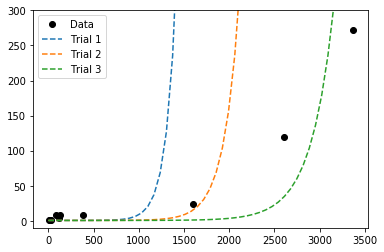

In [98]:
# SURVEY to test for param values
plt.plot(xdata, ydata, "ko", label="Data")

x_lin = np.linspace(0, xdata.max(), 50) # 50 evenly spaced digits between 0 and max

# Trials
#a should be positive and <1
N, a, d = 0.001, 0.009, 0.5
y_trial1 = func(x_lin,  N,  a, d)
y_trial2 = func(x_lin, 0.001, 0.006, 0.5)
y_trial3 = func(x_lin, 0.001, 0.004, 0.5)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.ylim(-10,300)
plt.legend()
plt.show()

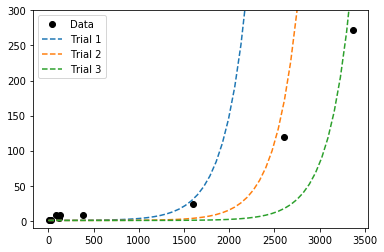

In [99]:
# SURVEY to test for param values
plt.plot(xdata, ydata, "ko", label="Data")

x_lin = np.linspace(0, xdata.max(), 50) # 50 evenly spaced digits between 0 and max

# Trials
N, a, d = 0.05, 0.004, 0.5
y_trial1 = func(x_lin,  N, a, d)
y_trial2 = func(x_lin, 0.005, 0.004, 0.5)
y_trial3 = func(x_lin, 0.0005, 0.004, 0.5)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.ylim(-10,300)
plt.legend()
plt.show()

('Estimated Parameters', array([ 6.09504802e+00,  1.13289792e-03, -3.33159155e+00]))


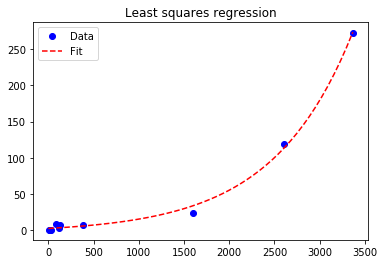

In [130]:
#define general powerlaw equation
#def func(x, N, a, d):
#    return N*np.exp(a*x)+d

# REGRESSION ------------------------------------------------------------------
p0 = [0.005, 0.004, -0.05]                                 # guessed params
w, _ = optimize.curve_fit(func, xdata, ydata, p0=p0)     
print("Estimated Parameters", w)  

# Model
y_model = func(x_lin, *w)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.plot(xdata, ydata, "bo", label="Data")
plt.plot(x_lin, y_model, "r--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.show()

In [131]:
obs_values = ydata
pred_values = []
residuals = []

#calculates the predicted values from the power law fit estimated params
for i in xdata:
    pred_i = (w[0] * (np.exp(w[1]*(i)))+w[2])
    pred_values.append(pred_i)
    
#calculates the residual for each pair of observations
for obs_v,pred_v in zip(obs_values,pred_values):
    Residual = float(obs_v - pred_v)
    residuals.append(Residual)
    
#calculate RMSE
n_residuals = len(residuals)
sqare_resids = np.square(residuals)

RMSE = np.sqrt((sqare_resids.sum())/(n_residuals-1))
std_residuals = (residuals/RMSE)

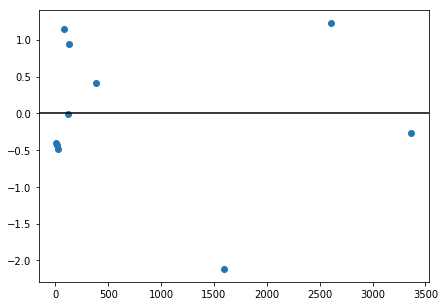

In [132]:
fig, ax = plt.subplots(figsize=(7,5))
plt.axhline(color='k')

plt.scatter(xdata, std_residuals)
plt.show()

In [135]:
DAQ = pd.read_csv('DA-QCalc.csv')
#DAQ